In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(["RowNumber","CustomerId","Surname"],axis="columns", inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

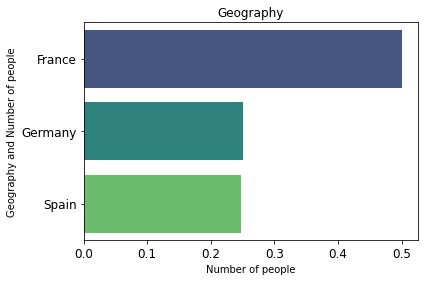

In [10]:
status = df["Geography"].value_counts(normalize=True)

sns.barplot(status.values, status.index, palette='viridis')
plt.title('Geography')
plt.xlabel('Number of people')
plt.ylabel('Geography and Number of people')
plt.tick_params(labelsize=12)
plt.show()

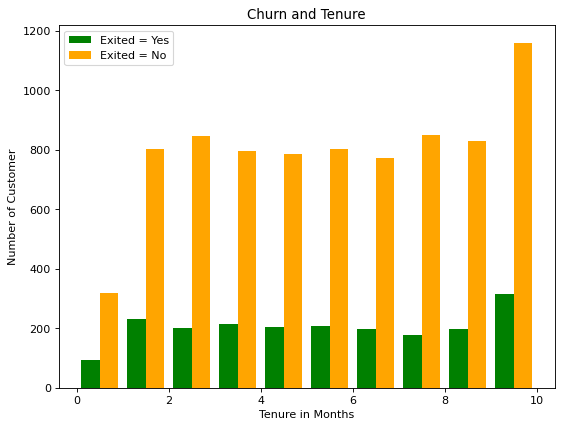

In [11]:
figure(figsize=(8, 6), dpi=80)
churn_t_no = df[df.Exited == 1].Tenure
churn_t_yes = df[df.Exited == 0].Tenure

plt.hist([churn_t_no,churn_t_yes],color=["green","orange"],label=["Exited = Yes","Exited = No"])
plt.title("Churn and Tenure")
plt.xlabel("Tenure in Months")
plt.ylabel("Number of Customer")
plt.legend()

In [12]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

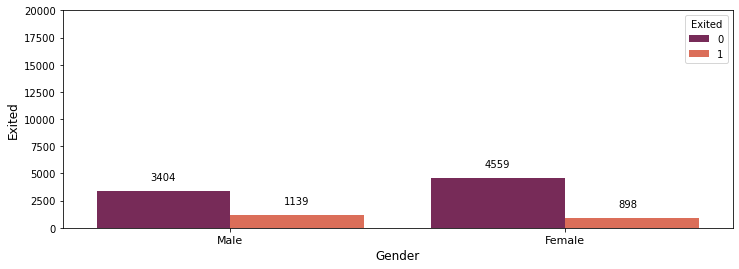

In [13]:
## Relation on Charges

plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'Gender', hue="Exited", palette = 'rocket')

plt.xlabel("Gender", fontsize= 12)
plt.ylabel("Exited", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

Text(0.5, 1.0, 'IsActiveMember and Exited')

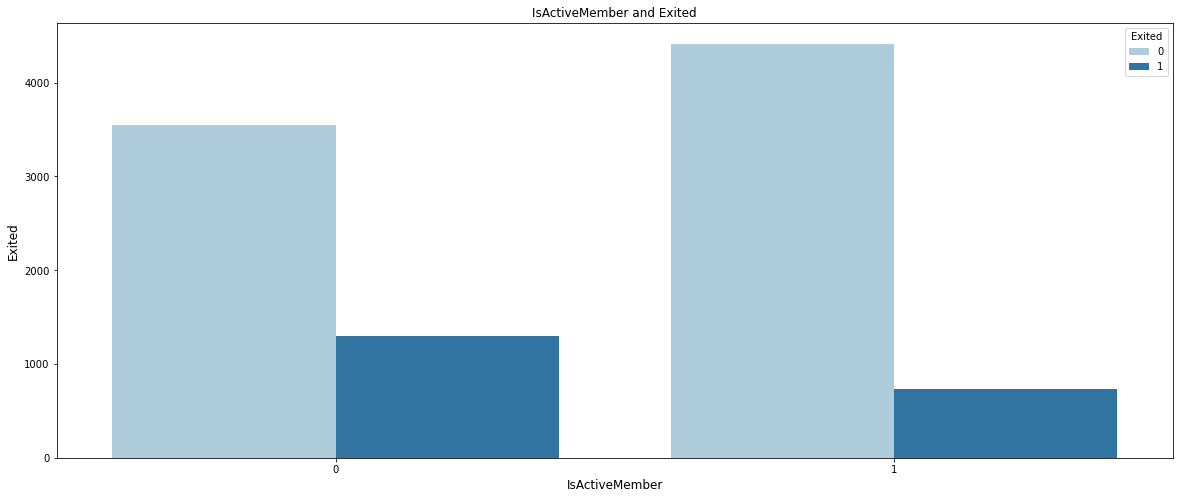

In [14]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'IsActiveMember', hue="Exited", palette = 'Paired')

plt.xlabel("IsActiveMember", fontsize= 12)
plt.ylabel("Exited", fontsize= 12)
plt.title("IsActiveMember and Exited")

In [33]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
def columns_objects(x):
    for i in df:
        if df[i].dtype == "object":
           print (i ,": ", df[i].unique())

In [17]:
columns_objects(df)

Geography :  ['France' 'Spain' 'Germany']
Gender :  ['Female' 'Male']


In [18]:
df.Gender.replace({"Female" : 1, "Male" : 0},inplace=True)
df.Gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [19]:
df2 = pd.get_dummies(data = df, columns = ["Geography"])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [20]:
# Scaling the Salary, Balance, Tenur and Credit Score 
scaling = [ "CreditScore", "Age","Balance","Tenure","EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df2[scaling] = scale.fit_transform(df2[scaling])
df2.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


## Using Models

In [21]:
X = df2.drop("Exited", axis=1)
y = df2.Exited

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [23]:
print ("The shape of X test is:", X_test.shape)
print ("The shape of X train is:", X_train.shape)
print ("The shape of y test is:", y_test.shape)
print ("The shape of y train is:", y_train.shape)

The shape of X test is: (2000, 12)
The shape of X train is: (8000, 12)
The shape of y test is: (2000,)
The shape of y train is: (8000,)


In [24]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

2021-12-26 02:37:34.583745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-26 02:37:34.615765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-26 02:37:34.616136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [25]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (12,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
    
])

model.compile(optimizer = "adam",
              loss = "binary_crossentropy", # output is binary
              metrics = ["accuracy"])


model.fit(X_train,y_train, epochs = 50)



2021-12-26 02:37:45.340924: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-26 02:37:45.342490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-26 02:37:45.342775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-26 02:37:45.342942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 0.5556 - accuracy: 0.7473
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4836 - accuracy: 0.7990
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4686 - accuracy: 0.7964
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.8004
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4505 - accuracy: 0.8040
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.8064
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4388 - accuracy: 0.8098
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.8127
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.8141
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.8152

In [26]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.8465


[0.36759620904922485, 0.8464999794960022]

In [27]:
yp = model.predict(X_test)
yp[:5]

array([[0.18955143],
       [0.4596577 ],
       [0.08473285],
       [0.395351  ],
       [0.38286686]], dtype=float32)

In [28]:
y_pred = []

for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [30]:
y_test[:5]

8793    0
1122    1
1283    0
9318    0
7765    0
Name: Exited, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1564
           1       0.82      0.38      0.52       436

    accuracy                           0.85      2000
   macro avg       0.84      0.68      0.71      2000
weighted avg       0.84      0.85      0.82      2000



Text(69.0, 0.5, 'Truth')

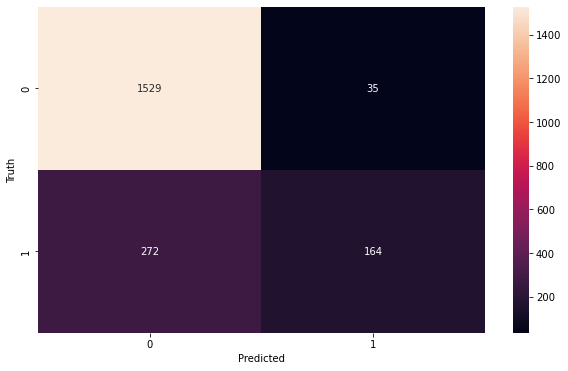

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True , fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")